<a href="https://colab.research.google.com/github/sdkchris/Projects/blob/main/Stochastic_gradient_descent_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stochastic gradient descent (SGD)

Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). 

It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). [wikipedia]

In [ ]:
#import dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='ticks', color_codes=True)

### The Data

1. Title: Tic-Tac-Toe Endgame database

2. Source Information
   -- Creator: David W. Aha (aha@cs.jhu.edu)
   -- Donor: David W. Aha (aha@cs.jhu.edu)
   -- Date: 19 August 1991
 
3. Known Past Usage: 
   1. Matheus,~C.~J., \& Rendell,~L.~A. (1989).  Constructive
      induction on decision trees.  In {\it Proceedings of the
      Eleventh International Joint Conference on Artificial Intelligence} 
      (pp. 645--650).  Detroit, MI: Morgan Kaufmann.
      -- CITRE was applied to 100-instance training and 200-instance test
         sets.  In a study using various amounts of domain-specific
         knowledge, its highest average accuracy was 76.7% (using the
         final decision tree created for testing).

   2. Matheus,~C.~J. (1990). Adding domain knowledge to SBL through
      feature construction.  In {\it Proceedings of the Eighth National
      Conference on Artificial Intelligence} (pp. 803--808). 
      Boston, MA: AAAI Press.
      -- Similar experiments with CITRE, includes learning curves up
         to 500-instance training sets but used _all_ instances in the
         database for testing.  Accuracies reached above 90%, but specific
         values are not given (see Chris's dissertation for more details).

   3. Aha,~D.~W. (1991). Incremental constructive induction: An instance-based
      approach.  In {\it Proceedings of the Eighth International Workshop
      on Machine Learning} (pp. 117--121).  Evanston, ILL: Morgan Kaufmann.
      -- Used 70% for training, 30% of the instances for testing, evaluated
         over 10 trials.  Results reported for six algorithms:
         -- NewID:   84.0%
         -- CN2:     98.1%  
         -- MBRtalk: 88.4%
         -- IB1:     98.1% 
         -- IB3:     82.0%
         -- IB3-CI:  99.1%
      -- Results also reported when adding an additional 10 irrelevant 
         ternary-valued attributes; similar _relative_ results except that
         IB1's performance degraded more quickly than the others.

4. Relevant Information:

   This database encodes the complete set of possible board configurations
   at the end of tic-tac-toe games, where "x" is assumed to have played
   first.  The target concept is "win for x" (i.e., true when "x" has one
   of 8 possible ways to create a "three-in-a-row").  

   Interestingly, this raw database gives a stripped-down decision tree
   algorithm (e.g., ID3) fits.  However, the rule-based CN2 algorithm, the
   simple IB1 instance-based learning algorithm, and the CITRE 
   feature-constructing decision tree algorithm perform well on it.

5. Number of Instances: 958 (legal tic-tac-toe endgame boards)

6. Number of Attributes: 9, each corresponding to one tic-tac-toe square

7. Attribute Information: (x=player x has taken, o=player o has taken, b=blank)

    1. top-left-square: {x,o,b}
    2. top-middle-square: {x,o,b}
    3. top-right-square: {x,o,b}
    4. middle-left-square: {x,o,b}
    5. middle-middle-square: {x,o,b}
    6. middle-right-square: {x,o,b}
    7. bottom-left-square: {x,o,b}
    8. bottom-middle-square: {x,o,b}
    9. bottom-right-square: {x,o,b}
   10. Class: {positive,negative}

8. Missing Attribute Values: None

9. Class Distribution: About 65.3% are positive (i.e., wins for "x")


### Loading in the data

In [ ]:
#load data in pandas tabular form
data = pd.read_csv('/Users/mac/Downloads/tic-tac-toe.data', names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Class'])
data.head()

,A,B,C,D,E,F,G,H,I,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
#summary of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
A        958 non-null object
B        958 non-null object
C        958 non-null object
D        958 non-null object
E        958 non-null object
F        958 non-null object
G        958 non-null object
H        958 non-null object
I        958 non-null object
Class    958 non-null object
dtypes: object(10)
memory usage: 74.9+ KB


In [ ]:
#number of Positive and Negative classes
data['Class'].value_counts()

positive    626
negative    332
Name: Class, dtype: int64

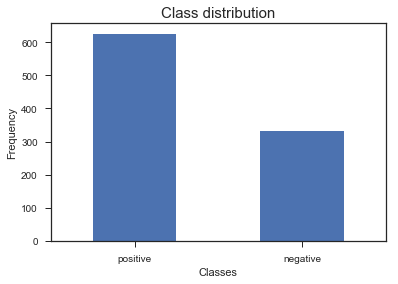

In [ ]:
count_classes = pd.value_counts(data['Class'],sort = True)
count_classes.plot(kind = 'bar', rot =0,fontsize=10)
plt.title("Class distribution",fontsize=15)
plt.xlabel("Classes")
plt.ylabel('Frequency')
plt.show()

The data is unbalanced, i.e the class "positive" has more instances than the class "negative".
When the distribution of classes present in a dataset is not uniform s.t. the number of instances of a class(Positve)  significantly out numbers the instances of another class(B) it leads to class imbalance.
This type of situation can be handled using techniques based on data stratification, over-sampling of minority class, one-class classification etc.

Let now balance this out by applying the stratification method. This function takes in the dataset, the column to be balanced and the number of oservations, and returns a well-balanced column. 


In [ ]:
def stratified(df, col, n_samples):
    minimum = min(n_samples, df[col].value_counts().min())
    col_groups = df.groupby(col).apply(lambda x: x.sample(minimum))
    col_groups.index = col_groups.index.droplevel(0)
    return col_groups

df =stratified(data,'Class',958)
df= pd.DataFrame(df)

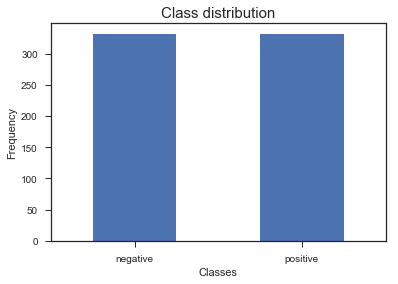

In [ ]:
#plotting stratified target values
count_classes = pd.value_counts(df['Class'],sort = True)
count_classes.plot(kind = 'bar', rot =0,fontsize=10)
plt.title("Class distribution",fontsize=15)
plt.xlabel("Classes")
plt.ylabel('Frequency')
plt.show()


In [ ]:
#number of Positive and Negative classes
df['Class'].value_counts()

negative    332
positive    332
Name: Class, dtype: int64

Tis method has created an equal and balanced Class column based on the previous column. So now, instead of 626 positive values and 332 negative values, we have a randomly picked equal number of positive and negative values. 


We see that all of our data points are non-numeric values, so we will need to convert them into numeric values by using the pandas function get_dummies().

In [ ]:
#mapping categorical values of column "class" in numerical, i.e: positive = 1, and negative= 0
target = data.Class.map({
    'positive':1,
    'negative':0
}) 
target = pd.DataFrame(target)
target.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [ ]:
#create independent and dependent varialbes
Y = target
cols = data.columns.tolist()
#filter the columns to remove data we do not want
cols = [c for c in cols if c not in 'Class']
X = data[cols]
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 8 columns):
A    958 non-null object
B    958 non-null object
D    958 non-null object
E    958 non-null object
F    958 non-null object
G    958 non-null object
H    958 non-null object
I    958 non-null object
dtypes: object(8)
memory usage: 60.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 1 columns):
Class    958 non-null int64
dtypes: int64(1)
memory usage: 7.6 KB
None


In [ ]:
df.head()

,A,B,C,D,E,F,G,H,I,Class
855,o,b,x,x,o,b,b,x,o,negative
705,x,b,x,x,x,o,o,o,o,negative
841,o,o,o,b,x,b,x,x,b,negative
840,o,o,o,b,x,x,b,b,x,negative
885,b,x,x,o,o,o,x,b,b,negative


We have creaded an equal distribution of the sample.

### Spliting data into training and testing 

In [ ]:
def train_test_split(datase, size):
    train_data = datase.sample(frac=size)
    test_data = datase.drop(train_data.index)
    return train_data,test_data

In [ ]:
#training and testing sets
train, test = train_test_split(df,0.8)

In [ ]:
#splitting the data into training and testing data

X_train = train.drop(['Class'],axis =1)
X_test = test.drop(['Class'],axis = 1)

Y_train = train['Class'].map({'positive':1,'negative':0})
Y_test = test['Class'].map({'positive':1,'negative':0})

In [ ]:
X_train = pd.DataFrame(X_train)
X_train.head()

,A,B,C,D,E,F,G,H,I
873,o,b,b,x,o,b,x,x,o
107,x,x,b,o,x,o,b,x,o
213,x,o,b,o,x,b,b,b,x
528,b,o,x,x,x,x,b,o,o
9,x,x,x,x,b,o,o,o,b


In [ ]:
#converting the X train and test dataset into numerical values
X_train =  pd.get_dummies(X_train.copy())
X_test = pd.get_dummies(X_test.copy())
X_train.head()


,A_b,A_o,A_x,B_b,B_o,B_x,C_b,C_o,C_x,D_b,...,F_x,G_b,G_o,G_x,H_b,H_o,H_x,I_b,I_o,I_x
873,0,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
107,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
213,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
528,1,0,0,0,1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
9,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 873 to 937
Data columns (total 27 columns):
A_b    531 non-null uint8
A_o    531 non-null uint8
A_x    531 non-null uint8
B_b    531 non-null uint8
B_o    531 non-null uint8
B_x    531 non-null uint8
C_b    531 non-null uint8
C_o    531 non-null uint8
C_x    531 non-null uint8
D_b    531 non-null uint8
D_o    531 non-null uint8
D_x    531 non-null uint8
E_b    531 non-null uint8
E_o    531 non-null uint8
E_x    531 non-null uint8
F_b    531 non-null uint8
F_o    531 non-null uint8
F_x    531 non-null uint8
G_b    531 non-null uint8
G_o    531 non-null uint8
G_x    531 non-null uint8
H_b    531 non-null uint8
H_o    531 non-null uint8
H_x    531 non-null uint8
I_b    531 non-null uint8
I_o    531 non-null uint8
I_x    531 non-null uint8
dtypes: uint8(27)
memory usage: 18.1 KB


## Linear regression with gradient descent


To learn a Linear Regression Model, we will first define the following funtions:
* The log likelihood (objective function)
* y_pred 
* gradient
    


__Log likelihood function:__
$$Log L D (\beta) = \sum_{n=1}^{N} yn(Xn, \beta) - log(1 + e^{(Xn.\beta)}) $$

In [ ]:
#Compute log Likehood
def loglikelihood(X_train,Y_train,b):
    return np.sum((Y_train * (X_train.dot(b.T))) - np.log(1 + np.exp((X_train.dot(b.T)))))

The linear regression model is given by: $$Y^n = \sigma(\beta^T X^n)$$  where $\sigma$ is a logistic function.

$$\mathbf{\sigma} = \frac{1}  {1 +e^{-\beta^T X^n}} $$

In [ ]:
def y_pred(X_train,b):
    return 1/(1+np.exp(X_train.dot(b)))

Gradient function: 
$$\frac{\partial LD^{cond}(\beta)}{\partial\beta}= \sum_{n=1}^{N} ynXn - \frac{1}  {1 +e^{-\beta^T X^n}} Xn$$

In [ ]:
#the derivative
def gradient(X_train,Y_train,yhat): 
    error = Y_train - yhat
    return np.dot(error,X_train)

#### Step size: Bold driver

In [ ]:
#choosing a step length -->bold driver

def bolddriver(X_train,Y_train,b, alpha_old, alpha_plus,alpha_minus,d):
    fx = loglikelihood(X_train,Y_train,b)
    alpha = alpha_old * alpha_plus
    
    while fx - loglikelihood(X_train,Y_train,(b + alpha * d)) <= -0.001:  
        alpha = alpha * alpha_minus
    return alpha
        

In order to get the step length values from the our bolddriver function, we will compute the following function.

In [ ]:

def compute_alpha(X_train,Y_train,b,prev_alpha):
    yhat = y_pred(X_train,b)
    d= gradient(X_train,Y_train, yhat)#current gradient
    new_alpha = bolddriver(X_train,Y_train,b,prev_alpha, 1.1, 0.5, d)#get new values for new step length
    return new_alpha #returns new alpha

In [ ]:
def sga_bolddriver(X_train,Y_train,b,alpha):
    prev_b = b #setting the current beta as the previous 
    shuffler = np.random.randint(0,X_train.shape[0],X_train.shape[0]) #randomly generates a list of numbers 
    
    for i in shuffler: #for each row picked by the shuffler
        y_hat = y_pred(X_train.iloc[i], prev_b)
        grad = gradient(X_train.iloc[i], Y_train.iloc[i], y_hat)#computing the gradient for the chosen row
        prev_b = b #set beta
        b = prev_b + alpha * grad #update rule
    return b


#### Learn Linear regression function 

In [ ]:
#learn-logreg-GA

def learn_logreg_GA(X_train,Y_train, max_iteration,X_test,Y_test):
    func_diff = []# f(x-1) - f(x) 
    log_loss = []#log loss on test data
    b = np.zeros(X_train.shape[1])#we initialize beta with zeros
    alpha = 0.1
    epsillon = 0.0000001
    
    L = loglikelihood(X_train,Y_train,b)#initial log likelihood 
    
    for i in range(max_iteration):
        prev_log = L
        alpha = compute_alpha(X_train,Y_train,b,alpha)
        b = sga_bolddriver(X_train,Y_train,b,alpha)#update beta
        
        L = loglikelihood(X_train, Y_train,b)
        diff = abs (L - prev_log)#differences between logs 
        func_diff.append(diff)
        
        diff_test = loglikelihood(X_test, Y_test, b)    #compute log loss on test dataset
        log_loss.append((diff_test))
        
        
        #stopping criteria
        if diff < epsillon:
            print("The model converged after {} iteration".format(i))
            return func_diff,log_loss
    #if not converged 
    print("The model did not converge after {} iteration".format(max_iteration))
    return func_diff,log_loss     


### Linear regression model

In [ ]:

figure =plt.rcParams['figure.figsize']
figure[0]= 16
figure[1]= 8
plt.rcParams['figure.figsize'] = figure

In [ ]:
max_iteration = 100

func_diff, log_loss = learn_logreg_GA(X_train,Y_train, max_iteration,X_test,Y_test)


The model did not converge after 100 iteration


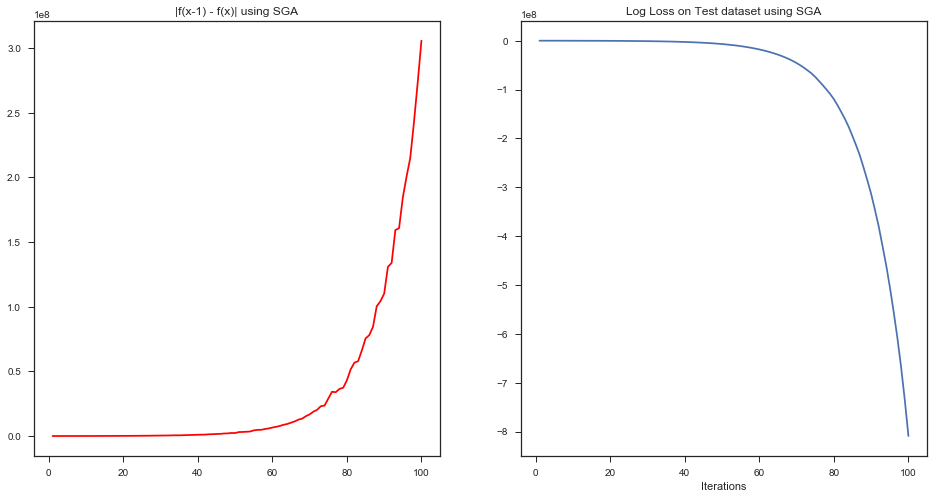

In [ ]:
fig, axarr= plt.subplots(1, 2)

axarr[0].set_title("|f(x-1) - f(x)| using SGA")
axarr[0].plot(np.arange(1,len(func_diff) +1), func_diff, color="red")

axarr[1].set_title("Log Loss on Test dataset using SGA")
axarr[1].plot(np.arange(1,(len(log_loss) +1)), log_loss)

plt.xlabel("Iterations")
plt.show()

__Comment:__
The Graphs above are the results of running the logistic model on the Tic Tac Toe dataset. The left plot is the Log likelihood difference between iterations on the training dataset and the graph on the right is the Log Loss on the testing dataset.

The interesting thing to notice here is that the Log Likelihood difference on the testing dataset increases with the number of iterations. For the first 60 iterations, the loss differences are close to 0 but increase drastically after the 60th iterations.

As for the log loss in the testing dataset, we notice that the Log Loss is constant and close to 0 for the first 50 iterations, then decreases drastically with the number of iterations. 


### Implementing Stochastic Gradient Ascent with AdaGrad for adaptive step length

### Implementation of Stepsize Adagrad function.

To use AdaGrad to compute the step length in each SGA iterations, we will use the function below. The function takes as a parameter:
* Current Gradient
* Previous Gradient History
* Old Stepsize

THe function then returns the updated Stepsize and the gradient history.

In [ ]:
def compute_alpha_ada(g, h, old_stepsize):
    
    h = h + np.multiply(g,g)
    
    stepsize = old_stepsize / np.sqrt(h)    
    
    return stepsize, h

In order to use AdaGrad, the function for Stochastic Gradient Ascent was slightly modified. The step size in this function is now a vector of same size as the gradient.

In each iteration, the function will now compute the Step Size with the Adagrad Function, by passing the current gradient, the history of gradient and previous step size.

In [ ]:
def SGA_adagrad (X_train, Y_train, beta): 
    
    prev_beta = beta
    
    yhat = y_pred(X_train, prev_beta)
    
    grad = gradient(X_train, Y_train, yhat)
    
    prev_gradient = np.ones(beta.shape[0])
    
    stepsize = [0.001] * len(prev_gradient)
    
    random_list = np.random.randint(0, X_train.shape[0], X_train.shape[0])
    
    for n in random_list:
        
        stepsize, prev_gradient = compute_alpha_ada(grad, prev_gradient, stepsize)
        
        yhat = y_pred(X_train.iloc[n], prev_beta)
        
        grad = gradient(X_train.iloc[n],Y_train.iloc[n], yhat)  
        
        prev_beta = beta

        beta = prev_beta + stepsize * grad
    
    return beta

To use the Adagrad algorithm for computing step length, the function to learn a Logistic Regression was also modified. This function now no longer computes the Step Size as this is done in the stochastic gradient function.

In [ ]:
def learn_logreg_GA_ADA(X_train, Y_train, max_interation, X_test, Y_test):
    
    func_diff = []# f(x-1) - f(x) 
    log_loss = []#log loss on test data
    #f_diff_loss = []
    #log_list_loss = []    
    
    beta = np.ones(X_train.shape[1])
    
    epsillon = 0.0000001
    
    log_likelihood = loglikelihood(X_train, Y_train,beta)
    
    for i in range(max_interation):
        
        prev_log = log_likelihood
        
        beta = SGA_adagrad(X_train, Y_train, beta)
        
        log_likelihood = loglikelihood(X_train, Y_train, beta)
        
        diff = abs(prev_log - log_likelihood)
        func_diff.append(diff)
           
        logloss_test = loglikelihood(X_test, Y_test, beta)
        log_loss.append(abs(logloss_test))
        
        
        if diff < epsillon:
            
            print("Model converged after {} iterations.".format(i))
            
            return func_diff,log_loss   
    
    print("Model did not converge after {} iterations.".format(max_interation))
    
    return func_diff,log_loss      

## Evaluating the Logistic Regression Model

In [ ]:
max_iteration = 100
func_diff_ada,log_loss_ada  = learn_logreg_GA_ADA(X_train, Y_train, max_iteration, X_test,Y_test)

Model converged after 23 iterations.


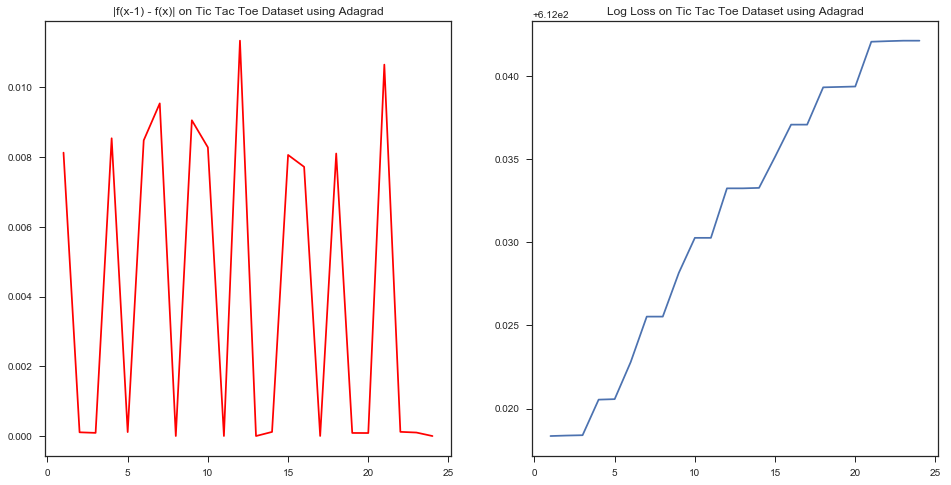

In [ ]:
fig1, axarr1= plt.subplots(1, 2)

axarr1[0].set_title("|f(x-1) - f(x)| on Tic Tac Toe Dataset using Adagrad")
axarr1[0].plot(np.arange(1,len(func_diff_ada) +1), func_diff_ada, color="red")

axarr1[1].set_title("Log Loss on Tic Tac Toe Dataset using Adagrad")
axarr1[1].plot(np.arange(1,len(log_loss_ada) +1), log_loss_ada)

plt.show()

### Implement Newton Algorithm

In [ ]:
#first derivative or gradient g 

def gradient_g(X_train,Y_train,b): 
    yhat= y_pred(X_train,b)
    return np.dot(X_train.T, (Y_train - y_hat))
    

In [ ]:
#defining the hessian matrix
def hessian(X_train,b):
    yhat= y_pred(X_train,b)
    W = np.diag(y_hat*(1 - y_hat))
    return np.dot(X_train.T, (np.dot(W, X_train)))

In [ ]:
def learn_logreg_GA_newton(X_train,Y_train,max_iteration, beta_old, X_test,Y_test ):
    func_diff = []# f(x-1) - f(x) 
    log_loss = []#log loss on test data
    beta_old = np.zeros(X_train.shape[1])
    epsillon = 0.000000001
    #y_hats = []
    #losses = []
    #before optimization
    L = loglikelihood(X_train,Y_train,beta_old)#initial log likelihood 
    y_hat = y_pred(X_train, beta_old)
    for i in range(max_iteration):
        prev_log = L
        gradient = np.dot(X_train.T, (Y_train - y_hat)) #first derivative--could have also used the dunction defined previously
        W = np.diag(y_hat*(1 - y_hat)) #diagonal matrix
        h = np.dot(X_train.T, (np.dot(W, X_train))) #hessian matrix--could have also used the dunction defined previously
        beta_new =  beta_old + 0.1 *np.dot( np.linalg.pinv(h),gradient)  #update rule
        beta_old = beta_new #update beta_old
       
        #after optimization
        L = loglikelihood(X_train,Y_train,beta_old)
        
        diff = abs (L - prev_log)#differences between logs 
        func_diff.append(diff)
        
        diff_test = loglikelihood(X_test,Y_test,beta_old) #compute log loss on test dataset
        log_loss.append((diff_test))
        
        
        #stopping criteria
        if diff < epsillon:
            print("The model converged after {} iteration".format(i))
            return func_diff,log_loss
    #if not converged 
    print("The model did not converge after {} iteration".format(max_iteration))
    return func_diff,log_loss     


### Evaluating the Logistic Regression Model

The maximum number of iterations chosen is 100.

In [ ]:
max_iteration = 100
beta_old = np.zeros(X_train.shape[1])

func_diff_newton, log_loss_newton = learn_logreg_GA_newton(X_train,Y_train, max_iteration,beta_old,X_test,Y_test)


The model did not converge after 100 iteration


In [ ]:
figure =plt.rcParams['figure.figsize']
figure[0]= 16
figure[1]= 8
plt.rcParams['figure.figsize'] = figure

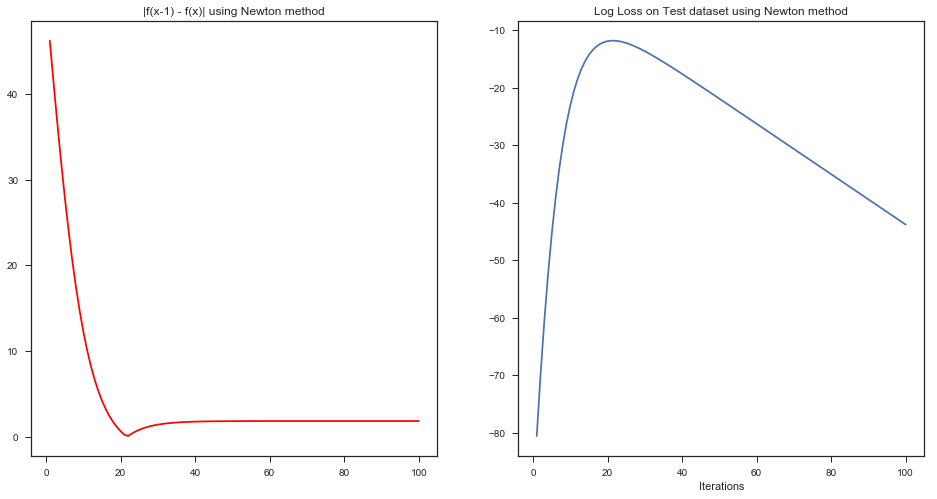

In [ ]:
#plotting the likelihood differences and the log loss
fig, axarr= plt.subplots(1, 2)

axarr[0].set_title("|f(x-1) - f(x)| using Newton method")
axarr[0].plot(np.arange(1,len(func_diff_newton) +1), func_diff_newton, color="red")

axarr[1].set_title("Log Loss on Test dataset using Newton method")
axarr[1].plot(np.arange(1,(len(log_loss_newton) +1)), log_loss_newton)

plt.xlabel("Iterations")
plt.show()

__Comments:__

The Graphs above are the results of running the logistic model on the Tic Tac Toe dataset. The left plot is the Log likelihood difference between iterations on the training dataset and the graph on the right is the Log Loss on the testing dataset.

We notice that by using the Newtom method, the log likelihood difference graph decreases exponentially between the first and the 20th iterations. Between iteration 20 to 100, we observe a more or less constant value of the graph where it remains low, around zero for the rest of the iterations.

The log loss on the otherhand starts higher but appears to be decreasing linearly after 20 iterations and continues to decrease for the rest of the iterations.  
<br>
<br>
<br>
__Conclusion:__

Gradient descent maximizes a function using knowledge of its derivative while Newton's method, a root finding algorithm, maximizes a function using knowledge of its second derivative. 
The Newton's method can converge faster when the second derivative is known and easy to compute. However, the analytic expression for the second derivative is often complicated and expensive to comute, requiring a lot of computation. Numerical methods for computing the second derivative also require a lot of computation. For example, if 𝑁 values are required to compute the first derivative, 𝑁2 are required for the second derivative.

As for our usecase, although Newton's algorith converges faster than Stochastic gradient descent we'd better stick with the later because in extreme cases gradient descent will tend to win out, especially for very poorly behaved function. 